In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# Global constants
N = 100 # number of samples per class
D = 2 # number of features
K = 3 # number of classes
REGULARIZATION_RATE = 1e-3
LEARNING_RATE = 1e-0

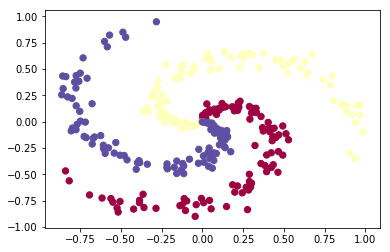

In [22]:
#Generating data
X = np.zeros((N * K, D))
Y = np.zeros(N*K, dtype = 'uint8')

for j in range(K):
    ix = [e for e in range(N*j, N * (j + 1))] #indexes of elements for current class
    r = np.linspace(0., 1., N) # radiuses for element
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 #theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 40, cmap = plt.cm.Spectral)
plt.show()

In [5]:
# Softmax linear classifier
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

num_of_examples = X.shape[0]
scores = np.dot(X, W) + b
num_examples = X.shape[0]
exp_scores = np.exp(scores)
sum_of_exp = np.sum(exp_scores, axis = 1, keepdims = True)
probs = exp_scores / sum_of_exp

log_prob = - np.log(probs[np.arange(num_of_examples), Y])
data_loss = np.sum(log_prob) / num_of_examples
regularization_loss = 0.5 * REGULARIZATION_RATE * np.sum(W * W)
loss = data_loss + regularization_loss
print(loss)

1.09848258028


In [6]:
#Calculate gradient
dscores = probs
dscores[np.arange(num_of_examples), Y] -= 1
dscores /= num_of_examples

dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis = 0, keepdims = True)
dW += REGULARIZATION_RATE * W

In [7]:
# Performing a parameter update
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db 

In [8]:
def iteration(X, Y, W, b):
    num_of_examples = X.shape[0]
    scores = np.dot(X, W) + b
    num_examples = X.shape[0]
    exp_scores = np.exp(scores)
    sum_of_exp = np.sum(exp_scores, axis = 1, keepdims = True)
    probs = exp_scores / sum_of_exp

    log_prob = - np.log(probs[np.arange(num_of_examples), Y])
    data_loss = np.sum(log_prob) / num_of_examples
    regularization_loss = 0.5 * REGULARIZATION_RATE * np.sum(W * W)
    loss = data_loss + regularization_loss
    dscores = probs
    dscores[np.arange(num_of_examples), Y] -= 1
    dscores /= num_of_examples

    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)
    dW += REGULARIZATION_RATE * W
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db
    
    return loss

In [9]:
for i in range(10000):
    loss = iteration(X, Y, W, b)
    if i % 1000 == 0: print('%s: %s' % (i, loss))

0: 1.06873520525
1000: 0.766868946289
2000: 0.766868943264
3000: 0.766868942855
4000: 0.766868942799
5000: 0.766868942792
6000: 0.766868942791
7000: 0.766868942791
8000: 0.766868942791
9000: 0.766868942791


In [10]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == Y)))

training accuracy: 0.52


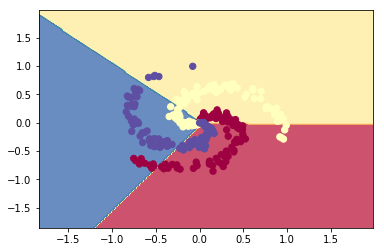

In [11]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [23]:
# NN
HIDDEN_LAYER_SIZE = 100
W1 = 0.01 * np.random.randn(D, HIDDEN_LAYER_SIZE)
b1 = np.zeros((1, HIDDEN_LAYER_SIZE))
W2 = 0.01 * np.random.randn(HIDDEN_LAYER_SIZE, K)
b2 = np.zeros((1, K)) 

In [24]:
num_examples = X.shape[0]
for i in range(10000):
    #forward propagation
    hidden_layer = np.maximum(np.dot(X, W1) + b1, 0)
    scores = np.dot(hidden_layer, W2) + b2
    
    exp_scores = np.exp(scores)
    sum_exp_scores = np.sum(exp_scores, axis = 1, keepdims = True)
    probs = exp_scores / sum_exp_scores
    
    #back propagation
    logprob = -np.log(probs[np.arange(num_examples), Y])
    data_loss = np.sum(logprob) / num_examples
    reg_loss = 0.5 * REGULARIZATION_RATE * np.sum (W1 * W1) + \
               0.5 * REGULARIZATION_RATE * np.sum (W2 * W2)
    loss = data_loss + reg_loss
    
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))
        
    dscores = probs
    dscores[np.arange(num_examples), Y] -= 1
    dscores /= num_examples
    
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis = 0, keepdims = True)
    
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0
    
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis = 0, keepdims = True)
    
    # add regularization gradient contribution
    dW2 += REGULARIZATION_RATE * W2
    dW1 += REGULARIZATION_RATE * W1
    
    # perform a parameter update
    W1 += -LEARNING_RATE * dW1
    b1 += -LEARNING_RATE * db1
    W2 += -LEARNING_RATE * dW2
    b2 += -LEARNING_RATE * db2
    
    

iteration 0: loss 1.098681
iteration 1000: loss 0.309691
iteration 2000: loss 0.264218
iteration 3000: loss 0.253473
iteration 4000: loss 0.250033
iteration 5000: loss 0.248174
iteration 6000: loss 0.247609
iteration 7000: loss 0.247226
iteration 8000: loss 0.246953
iteration 9000: loss 0.246302


In [28]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == Y)))

training accuracy: 0.99


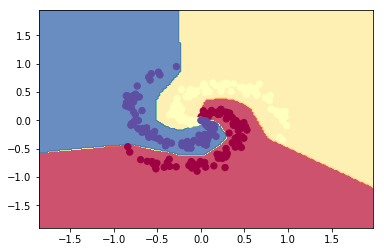

In [30]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()